# **Classification:** Perceptron Trick with (**Step Function**)

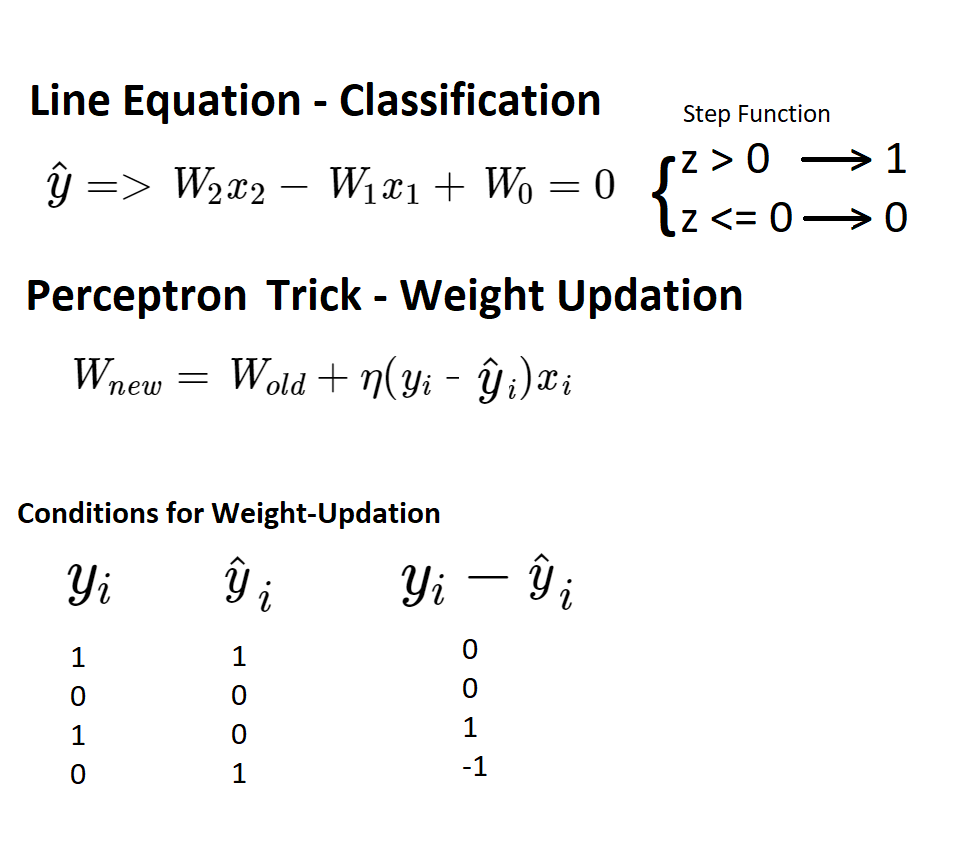

In [1]:
from IPython.display import Image
Image(filename='Percepton Trick with Step.png')

In [2]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

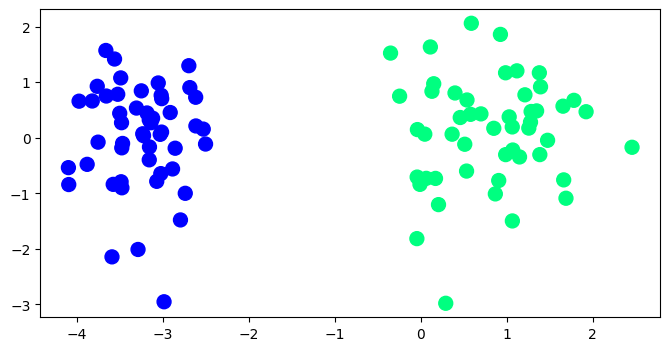

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y):

    def step(z):
        return 1 if z>0 else 0
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [5]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.05343617 0.2221512 ]
1.3000000000000003


In [6]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

print(f"m = {m:.2f}, b = {b:.2f}")

m = -4.74, b = -5.85


(-3.0, 2.0)

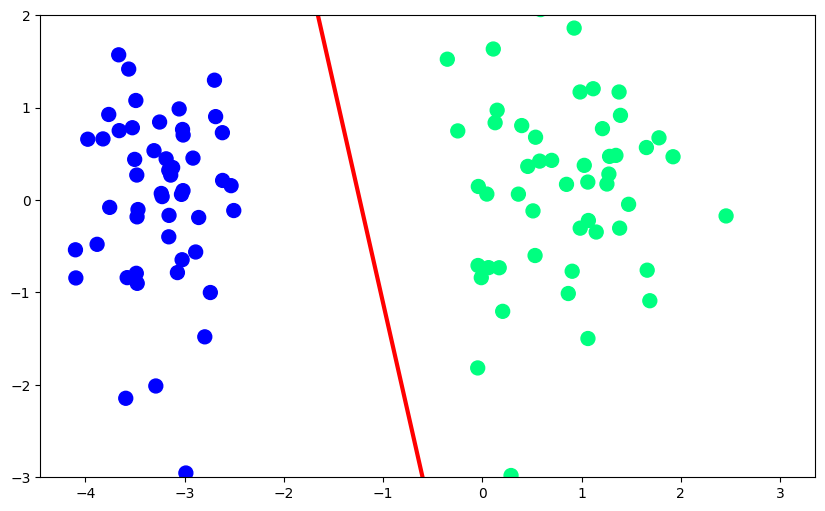

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [26]:
def perceptron(X,y):
    
    m = []
    b = []

    def step(z):
        return 1 if z>0 else 0
        
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

    

m,b = perceptron(X,y)

In [28]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

(-3.0, 2.0)

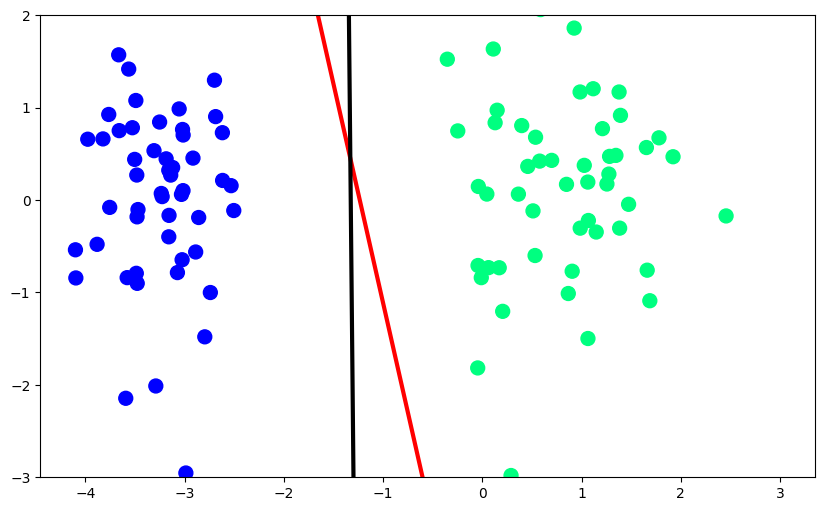

In [29]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)